100
(100, 100)


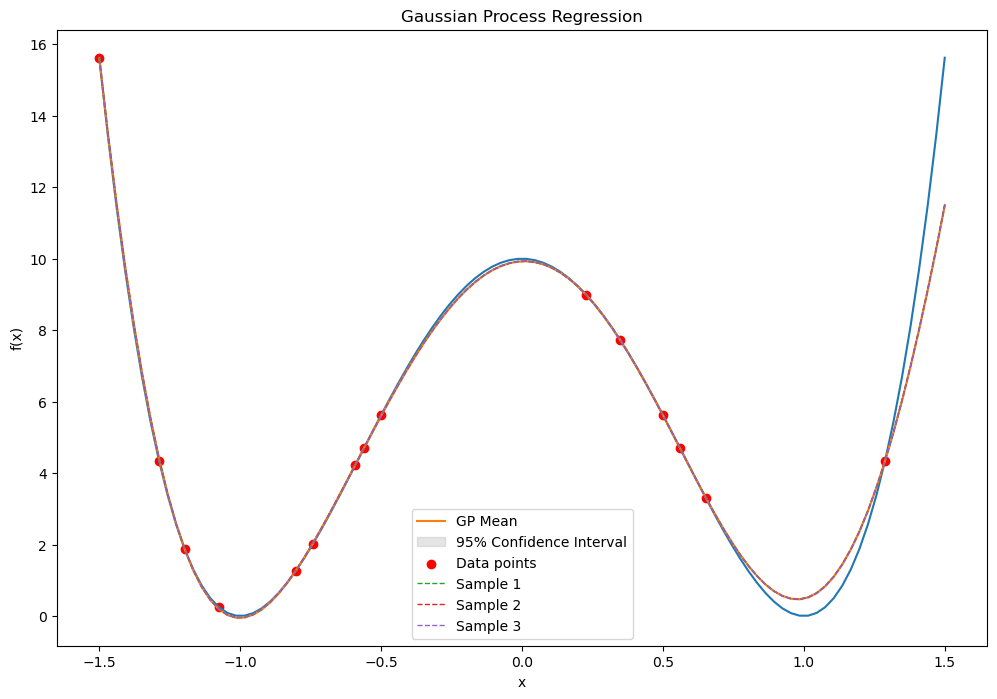

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF

def kernel(x, y, tau):
    "Kernel function for Gaussian Process Regression."
    return np.exp(-np.linalg.norm(x-y)**2 / (2 * tau**2))

def kernel_matrix(x, y, tau):
    "Creates a kernel matrix from the given data points x and the kernel parameter tau."
    n = len(x)
    m = len(y)
    K = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            K[i, j] = kernel(x[i], y[j], tau)
    return K
    
def f(x):
    return 10*(x-1)**2*(x+1)**2

# Points to evaluate the true function and the GP
eval_points = np.linspace(-1.5, 1.5, 100)

# True function values
y_true = f(eval_points)

num_points = 15
# Randomly selected points from eval_points to use for GP training
random_x = np.random.choice(eval_points, num_points, replace=False)
random_y = f(random_x)

# Kernel parameter
tau = 1

# Kernel matrices
K = kernel_matrix(random_x, random_x, tau)  # Kernel matrix for the training points
K_s = kernel_matrix(random_x, eval_points, tau)  # Cross kernel matrix from train to all eval points
K_ss = kernel_matrix(eval_points, eval_points, tau)  # Kernel matrix for all eval points

# Using the kernel matrix to make predictions
K_inv = np.linalg.inv(K + 1e-6 * np.eye(len(random_x)))  # Regularized inverse
mu = K_s.T.dot(K_inv).dot(random_y)
print(len(mu))
cov = K_ss - K_s.T.dot(K_inv).dot(K_s) + 1e-6 * np.eye(len(eval_points))
print(cov.shape)

# Draw samples from the posterior
samples = np.random.multivariate_normal(mu, cov, 3)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(eval_points, y_true, )
plt.plot(eval_points, mu, label='GP Mean')
plt.fill_between(eval_points, mu - 1.96 * np.sqrt(np.diag(cov)), mu + 1.96 * np.sqrt(np.diag(cov)),
                 color='gray', alpha=0.2, label='95% Confidence Interval')
plt.scatter(random_x, random_y, c='red', label='Data points')
for i, sample in enumerate(samples):
    plt.plot(eval_points, sample, lw=1, ls='--', label=f'Sample {i+1}')
plt.legend()
plt.title('Gaussian Process Regression')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


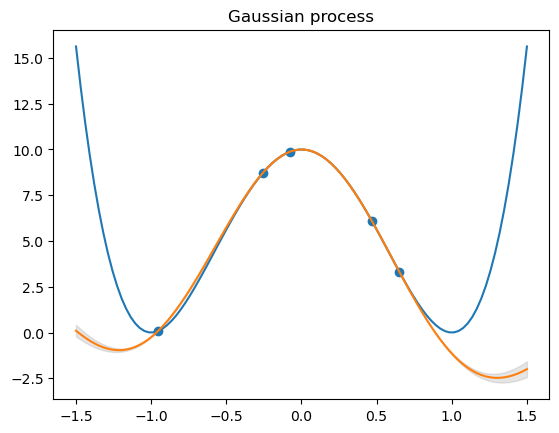

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def kernel(x, y, tau):
    "Kernel function for Gaussian Process Regression."
    return np.exp(-np.linalg.norm(x-y)**2 / (2 * tau**2))

def kernel_matrix(x, y, tau):
    "Creates a kernel matrix from the given data points x and the kernel parameter tau."
    n = len(x)
    m = len(y)
    K = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            K[i, j] = kernel(x[i], y[j], tau)
    return K
    
def f(x):
    return 10*(x-1)**2*(x+1)**2

# Points to evaluate the true function and the GP
eval_points = np.linspace(-1.5, 1.5, 100)

# True function values
y_true = f(eval_points)

num_points = 5
tau = 1
noise = 1e-3
# Randomly selected points from eval_points to use for GP training
train_x = np.random.choice(eval_points, num_points, replace=False)
train_y = f(train_x)


def mu(x):
    xs
    pass

def sigma(x):
    pass
    
    

K = kernel_matrix(train_x, train_x, tau) #Training-training matrix
K_inv = np.linalg.inv(K + 1e-6 * np.eye(len(train_x)))
K_s = kernel_matrix(train_x, eval_points, tau) #Training-testing matrix
K_ss = kernel_matrix(eval_points, eval_points, tau) #Testing-testing matrix

mu = K_s.T @ K_inv @ train_y 
sigma = K_ss - K_s.T @ K_inv @ K_s + 1e-6 * np.eye(len(eval_points))

sample = np.random.multivariate_normal(mu, cov, 1)

#Getting expected improvement
def expected_improvement(x):
    kernel_matrix([x], train_x) @ 



plt.plot(eval_points, y_true, label='True function')
plt.plot(eval_points, sample.T, label = "Sample")
plt.fill_between(eval_points, mu - 1.96 * np.sqrt(np.diag(sigma)), mu + 1.96 * np.sqrt(np.diag(sigma)),
                 color='gray', alpha=0.2, label='95% Confidence Interval')
plt.scatter(train_x, train_y)
plt.title("Gaussian process")
plt.show()




